<a href="https://colab.research.google.com/github/Rkjha6634/HOUSING-DYNAMIC-ANALYSIS/blob/main/DATA_ANALYST_HOUSE_SALES_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_excel('/content/HouseData.xlsx')
df = pd.DataFrame(data)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,20141022T000000,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,20141126T000000,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,20150129T000000,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,20150331T000000,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,20140911T000000,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215


In [ ]:
df.shape

(21060, 16)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

In [ ]:
df.isnull().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21060 non-null  int64  
 1   date         21060 non-null  object 
 2   price        21060 non-null  int64  
 3   bedrooms     21060 non-null  int64  
 4   bathrooms    21060 non-null  float64
 5   sqft_living  21060 non-null  int64  
 6   sqft_lot     21060 non-null  int64  
 7   floors       21060 non-null  float64
 8   waterfront   21060 non-null  object 
 9   view         21060 non-null  object 
 10  condition    21060 non-null  object 
 11  grade        21060 non-null  int64  
 12  yr_built     21060 non-null  int64  
 13  zipcode      21060 non-null  int64  
 14  lat          21060 non-null  float64
 15  long         21060 non-null  float64
dtypes: float64(4), int64(8), object(4)
memory usage: 2.6+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2014-10-22
1       2014-11-26
2       2015-01-29
3       2015-03-31
4       2014-09-11
           ...    
21055   2014-11-05
21056   2015-03-24
21057   2014-05-23
21058   2014-05-06
21059   2015-02-17
Name: date, Length: 21060, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           21060 non-null  int64         
 1   date         21060 non-null  datetime64[ns]
 2   price        21060 non-null  int64         
 3   bedrooms     21060 non-null  int64         
 4   bathrooms    21060 non-null  float64       
 5   sqft_living  21060 non-null  int64         
 6   sqft_lot     21060 non-null  int64         
 7   floors       21060 non-null  float64       
 8   waterfront   21060 non-null  object        
 9   view         21060 non-null  object        
 10  condition    21060 non-null  object        
 11  grade        21060 non-null  int64         
 12  yr_built     21060 non-null  int64         
 13  zipcode      21060 non-null  int64         
 14  lat          21060 non-null  float64       
 15  long         21060 non-null  float64       
dtypes: d

In [ ]:
cat_col =  [col for col in df.columns if df[col].dtype == 'O']
CAT_CAL  = df[cat_col]

In [ ]:
CAT_CAL

,waterfront,view,condition
0,No,No View,Average
1,No,No View,Very Good
2,No,No View,Good
3,No,Average,Average
4,No,Average,Average
...,...,...,...
21055,No,No View,Average
21056,No,No View,Poor- Worn out
21057,No,No View,Fair- Badly worn
21058,No,No View,Poor- Worn out


In [ ]:
def cat_col(df):
    for col in CAT_CAL:
        sns.countplot(data=df, x=col)
        plt.title(f'Count plot for {col}')
        plt.show()


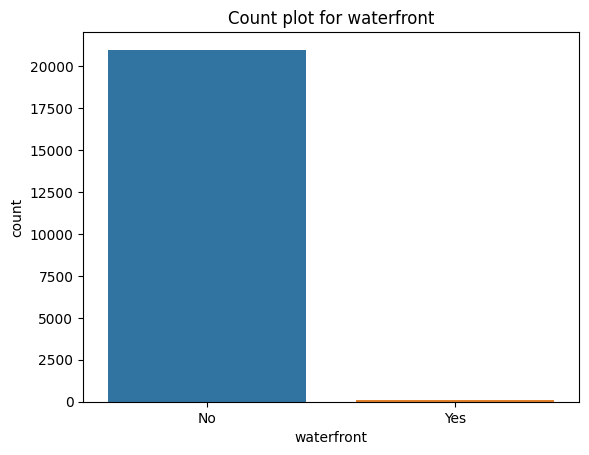

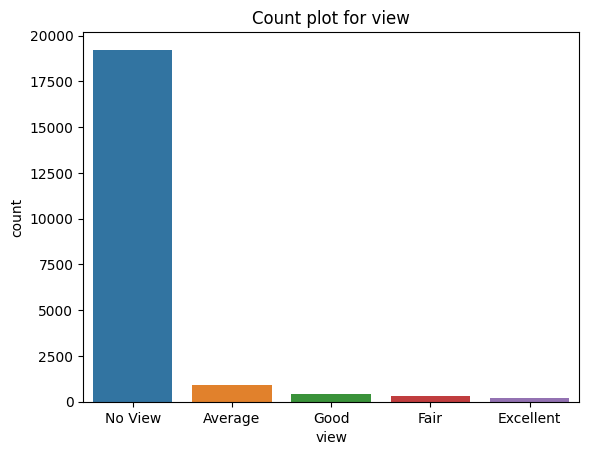

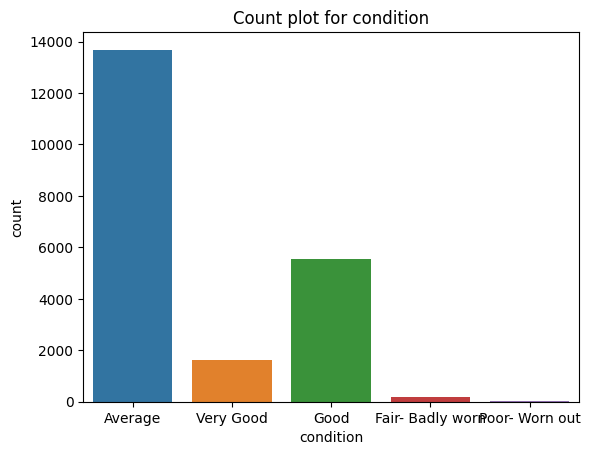

In [ ]:
cat_col(CAT_CAL)

In [ ]:
num_col =  [col for col in df.columns if df[col].dtype != 'O']
NUM_CAL  = df[num_col]

In [ ]:
NUM_CAL

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,zipcode,lat,long
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,10,1962,98004,47.5862,-122.198
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,9,1916,98122,47.6157,-122.287
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,9,1967,98004,47.6214,-122.227
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,12,1990,98034,47.6995,-122.228
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,10,1958,98040,47.5738,-122.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,3883800011,2014-11-05,82000,3,1.00,860,10426,1.0,6,1954,98146,47.4987,-122.341
21056,3028200080,2015-03-24,81000,2,1.00,730,9975,1.0,5,1943,98168,47.4808,-122.315
21057,8658300340,2014-05-23,80000,1,0.75,430,5050,1.0,4,1912,98014,47.6499,-121.909
21058,40000362,2014-05-06,78000,2,1.00,780,16344,1.0,5,1942,98168,47.4739,-122.280


In [ ]:
def Numerical_Plot(data, column):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.boxplot(data[column])
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"\n{str(column)} Box Plot\n", fontsize=15)

    plt.subplot(1, 2, 2)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.histplot(data=data, x=column, kde=True)
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Distribution Plot\n", fontsize=15)

    plt.show()

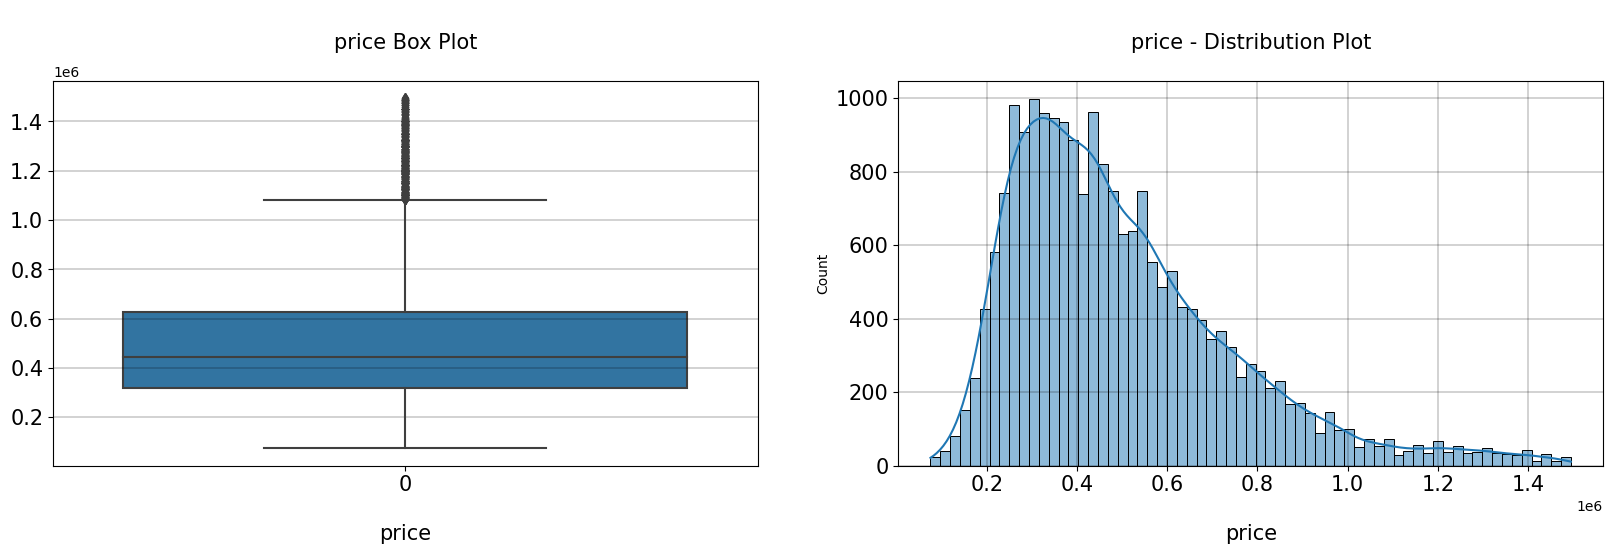

In [ ]:
Numerical_Plot(NUM_CAL,'price')

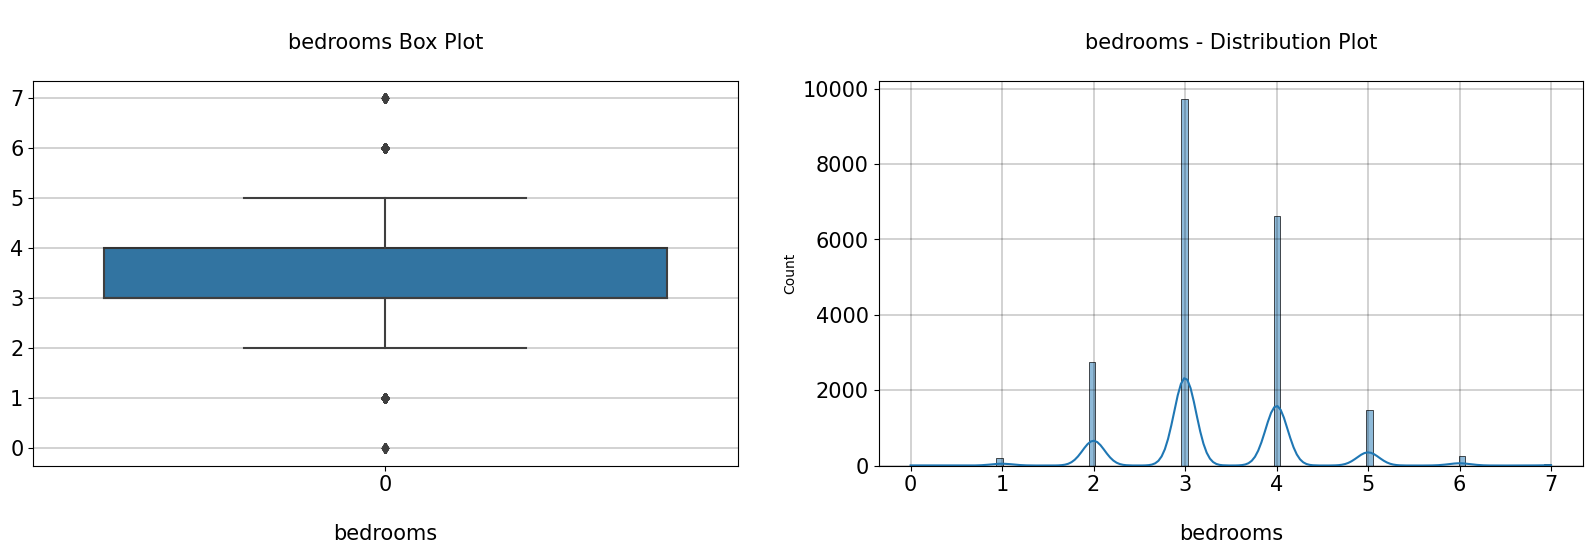

In [ ]:
Numerical_Plot(NUM_CAL,'bedrooms')

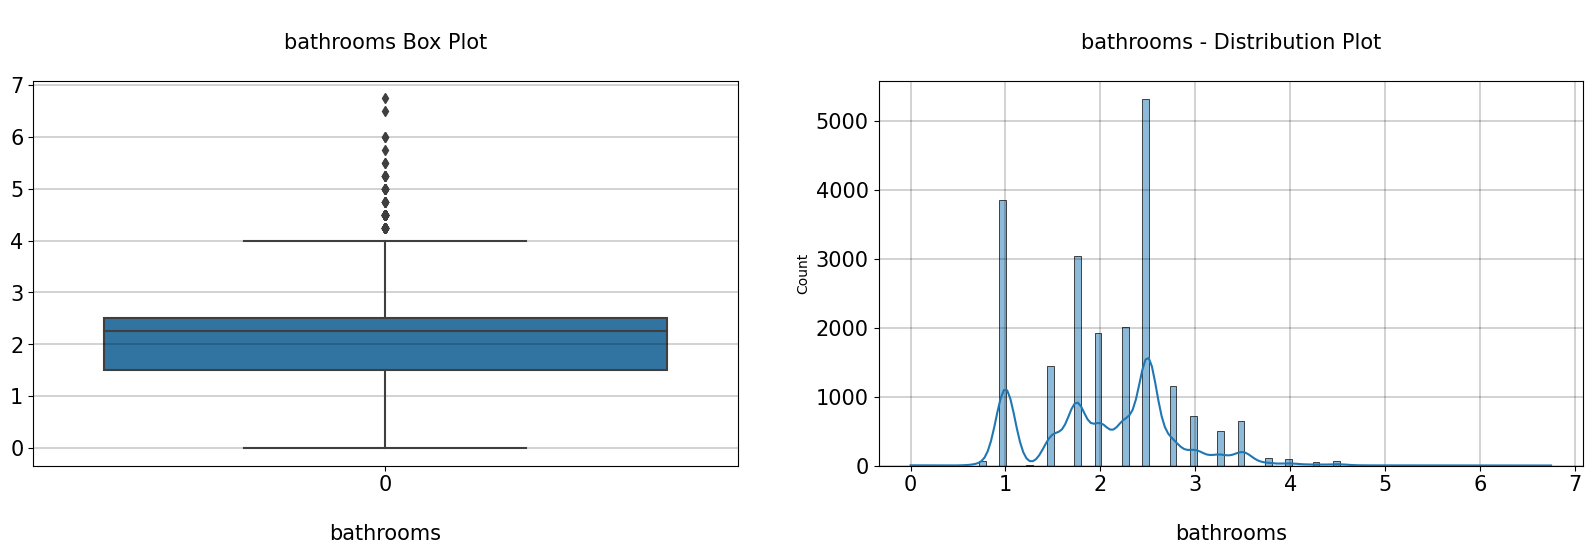

In [ ]:
Numerical_Plot(NUM_CAL,'bathrooms')

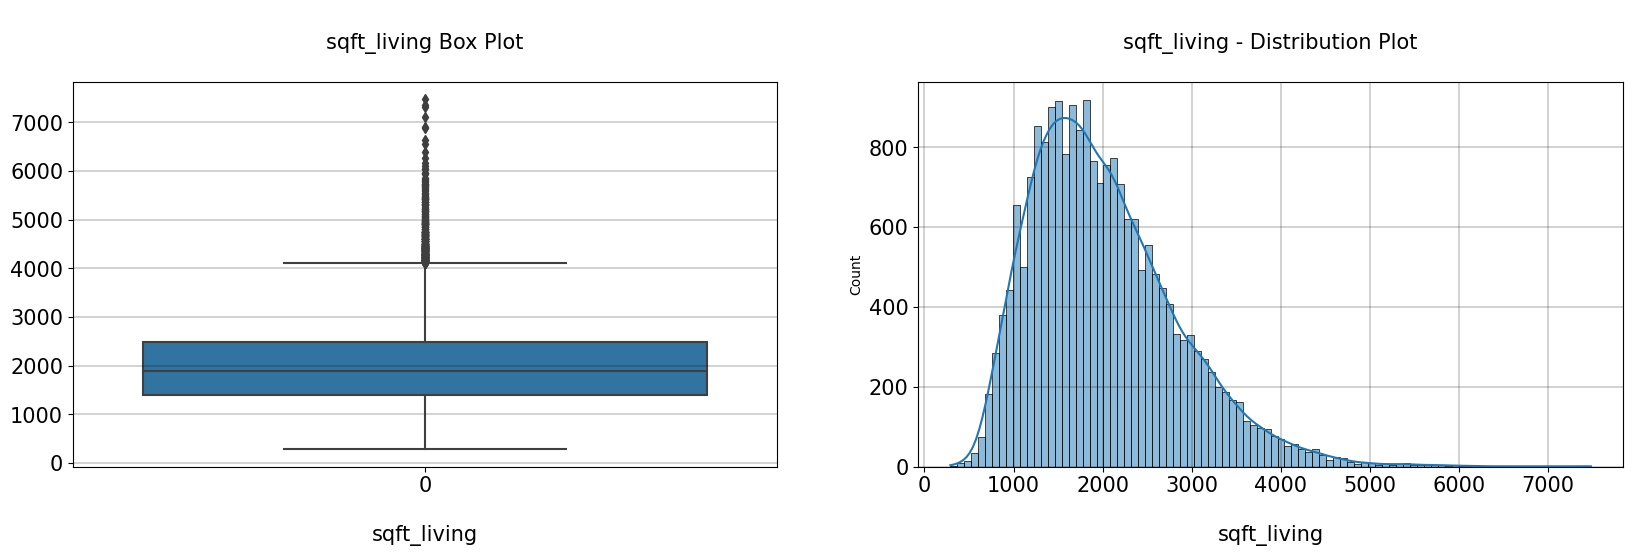

In [ ]:
Numerical_Plot(NUM_CAL,'sqft_living')

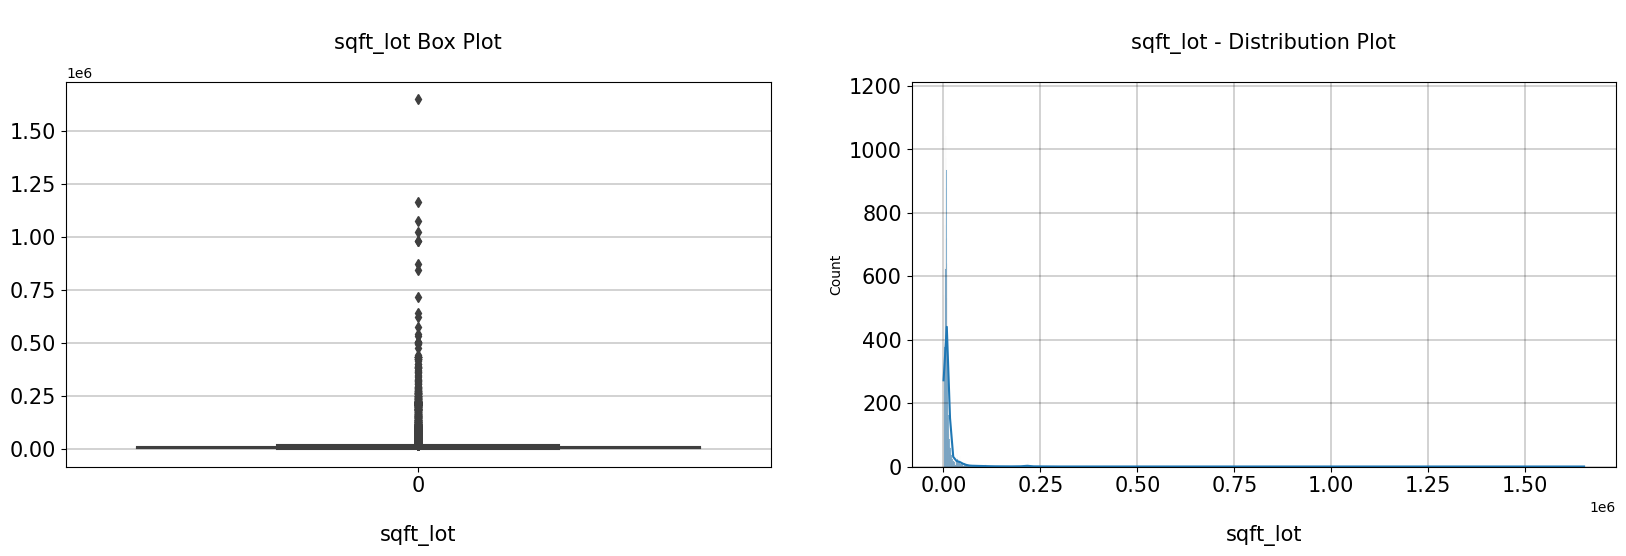

In [ ]:
Numerical_Plot(NUM_CAL,'sqft_lot')

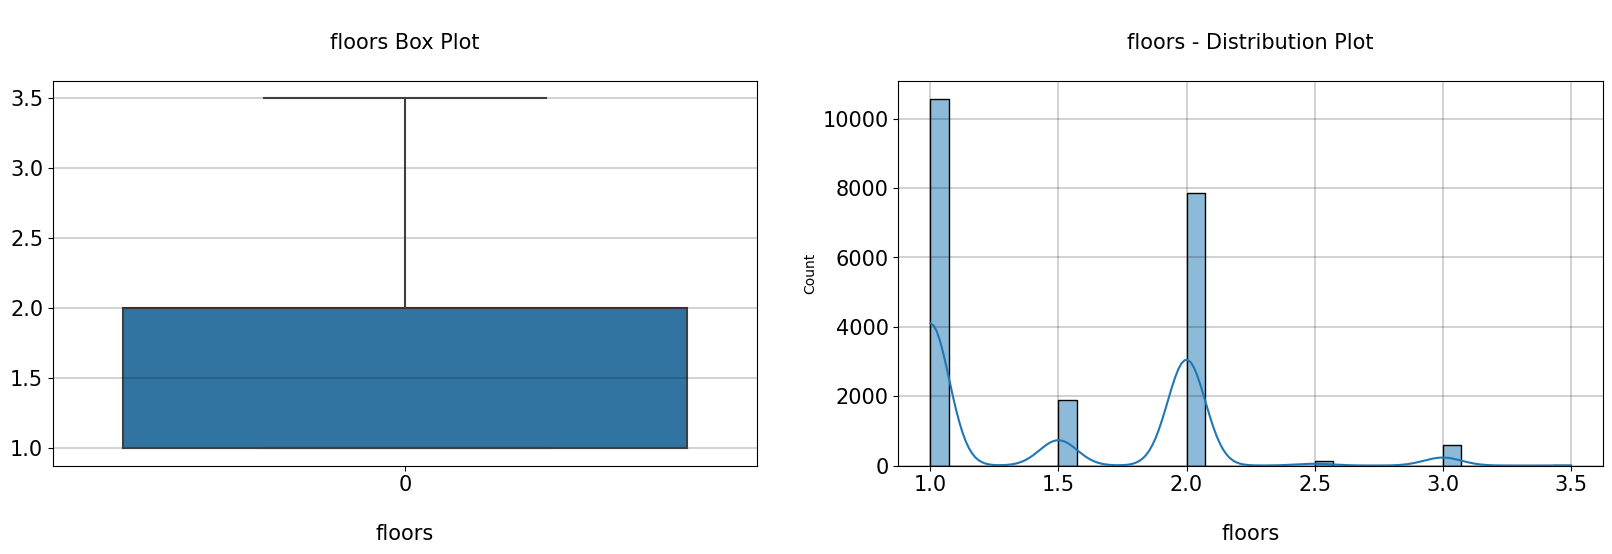

In [ ]:
Numerical_Plot(NUM_CAL,'floors')

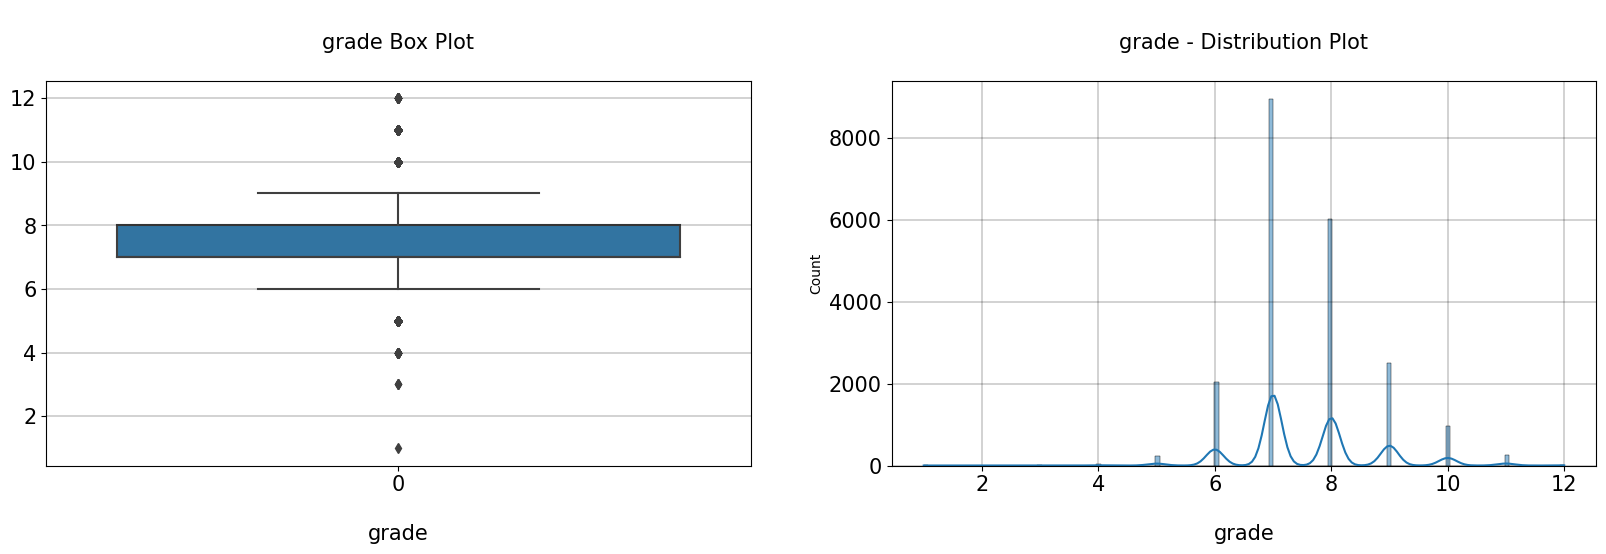

In [ ]:
Numerical_Plot(NUM_CAL,'grade')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215


**EDA**

**PRICE** **DISTRUBTION**

In [ ]:
df['price'].describe()

count    2.106000e+04
mean     5.002696e+05
std      2.465775e+05
min      7.500000e+04
25%      3.199500e+05
50%      4.450000e+05
75%      6.250000e+05
max      1.495000e+06
Name: price, dtype: float64

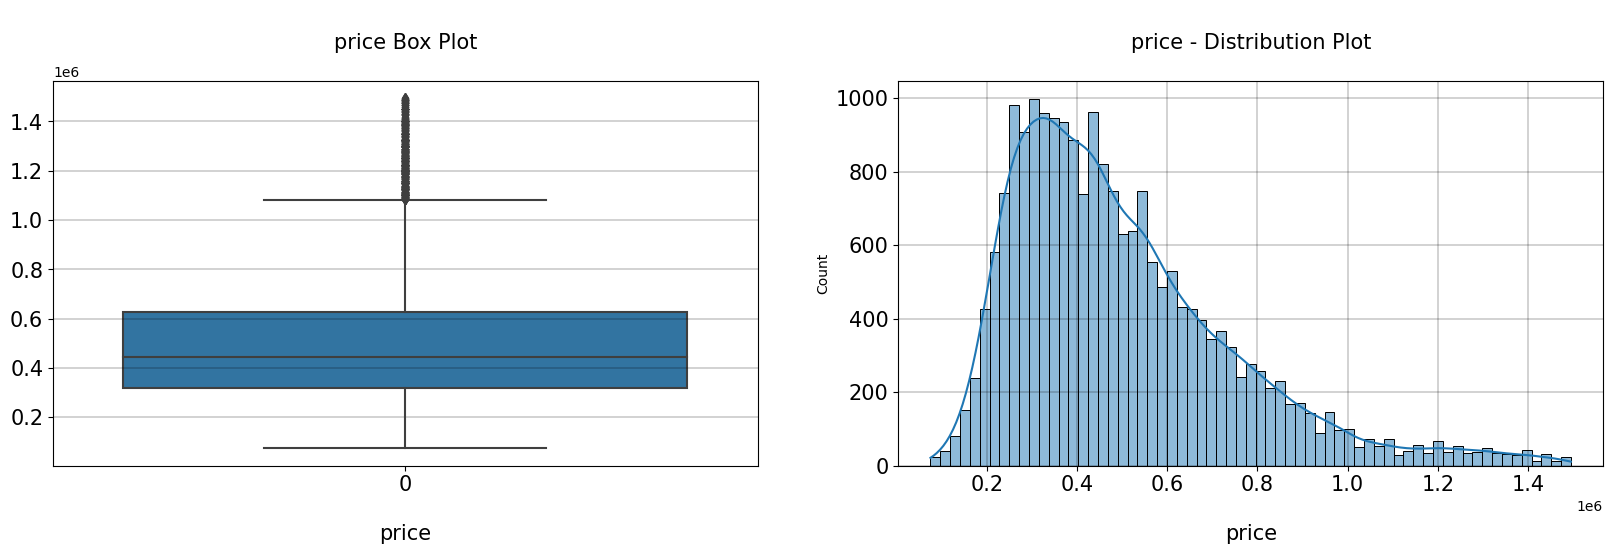

In [ ]:
Numerical_Plot(NUM_CAL,'price')




1.  as in right hand we see that the distubtion is right skewed which shows present of outliers as seen in the Box plot aslo






**BEDROOM VS PRICE**

In [ ]:
correlation = df['bedrooms'].corr(df['price'])
correlation

0.31738138646358754

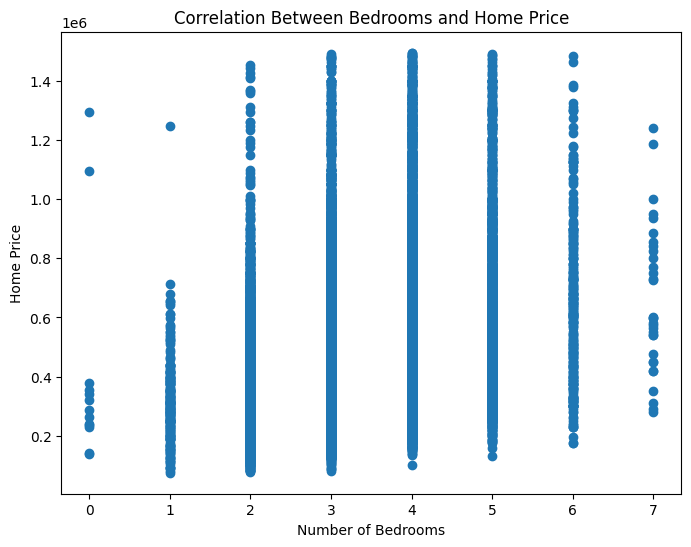

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bedrooms'], df['price'])
plt.title('Correlation Between Bedrooms and Home Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Home Price')
plt.show()





1.  The positive  (0.317) indicates that there is a chance for home prices to increase as the number of bedrooms increases




**ZIPCODE VS PRICE**

In [ ]:
zipcode_stats = df.groupby('zipcode')['price'].describe()
zipcode_stats

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98001,362.0,280804.690608,98979.230092,100000.0,215000.0,260000.0,319375.0,850000.0
98002,199.0,234284.035176,52041.448659,95000.0,199975.0,235000.0,268500.0,389000.0
98003,280.0,294111.278571,107597.662236,128000.0,229000.0,267475.0,330000.0,950000.0
98004,206.0,957420.266990,248683.335115,425000.0,770031.5,915000.0,1125000.0,1495000.0
98005,162.0,773399.376543,190155.433844,400000.0,627500.0,757500.0,896000.0,1325000.0
...,...,...,...,...,...,...,...,...
98177,243.0,602217.181070,245124.752034,245560.0,420000.0,530000.0,697000.0,1465000.0
98178,261.0,305289.432950,136316.219105,90000.0,223000.0,277554.0,349170.0,1100000.0
98188,136.0,289078.345588,103106.579944,110000.0,228750.0,264000.0,335000.0,707000.0


In [ ]:
zipcode_stats = zipcode_stats.sort_values(by='50%', ascending=False)
zipcode_stats

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98039,15.0,1.145200e+06,224880.269731,787500.0,938750.0,1200000.0,1335000.0,1450000.0
98040,221.0,9.550188e+05,233263.983999,500000.0,780000.0,925000.0,1130000.0,1490000.0
98004,206.0,9.574203e+05,248683.335115,425000.0,770031.5,915000.0,1125000.0,1495000.0
98112,216.0,8.559478e+05,289733.690672,169317.0,629125.0,794750.0,1068125.0,1475000.0
98005,162.0,7.733994e+05,190155.433844,400000.0,627500.0,757500.0,896000.0,1325000.0
...,...,...,...,...,...,...,...,...
98188,136.0,2.890783e+05,103106.579944,110000.0,228750.0,264000.0,335000.0,707000.0
98001,362.0,2.808047e+05,98979.230092,100000.0,215000.0,260000.0,319375.0,850000.0
98032,125.0,2.512962e+05,64705.426452,85000.0,221700.0,249000.0,285000.0,545000.0


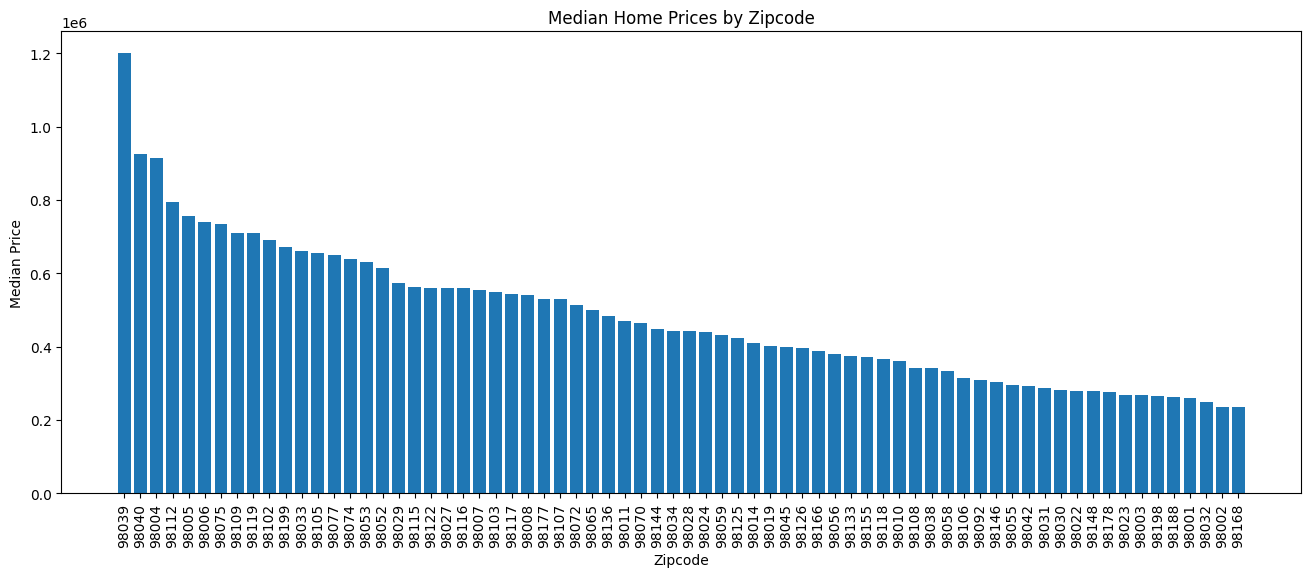

In [ ]:
plt.figure(figsize=(16, 6))
plt.bar(zipcode_stats.index.astype(str), zipcode_stats['50%'])
plt.title('Median Home Prices by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()



1.    location zipcode affect home prices as there are certain zip codes which have higher price 98039 has the highest price where as 98168 has the lowest as compared to others  




**WATERFRONT VS PRICE**

In [ ]:
average_price_with_waterfront = df[df['waterfront'] == 'Yes']['price'].mean()
average_price_without_waterfront = df[df['waterfront'] == 'No']['price'].mean()

In [ ]:
labels = ['With Waterfront', 'Without Waterfront']
average_prices = [average_price_with_waterfront, average_price_without_waterfront]

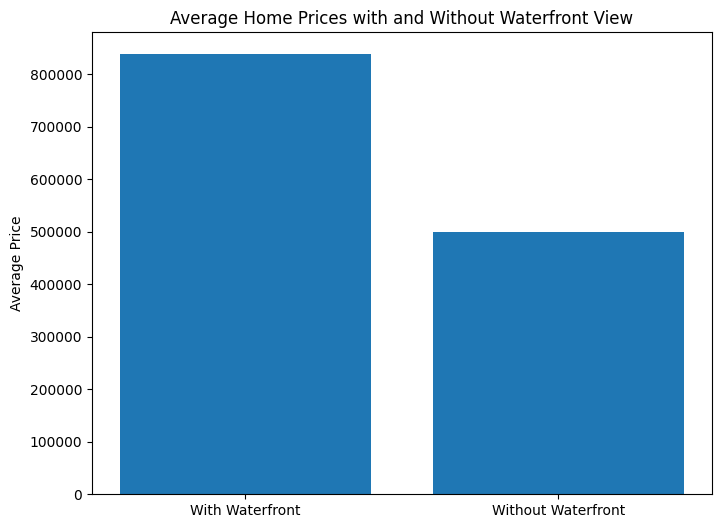

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(labels, average_prices)
plt.title('Average Home Prices with and Without Waterfront View')
plt.ylabel('Average Price')
plt.show()



1.   This indicates whether there is a notable price difference between properties with and without waterfront views .The Average price with waterfront is More as compared to without waterfront   



**SQFT_LIVING VS PRICE**

In [ ]:
correlation = df['sqft_living'].corr(df['price'])
correlation

0.6558679146062543

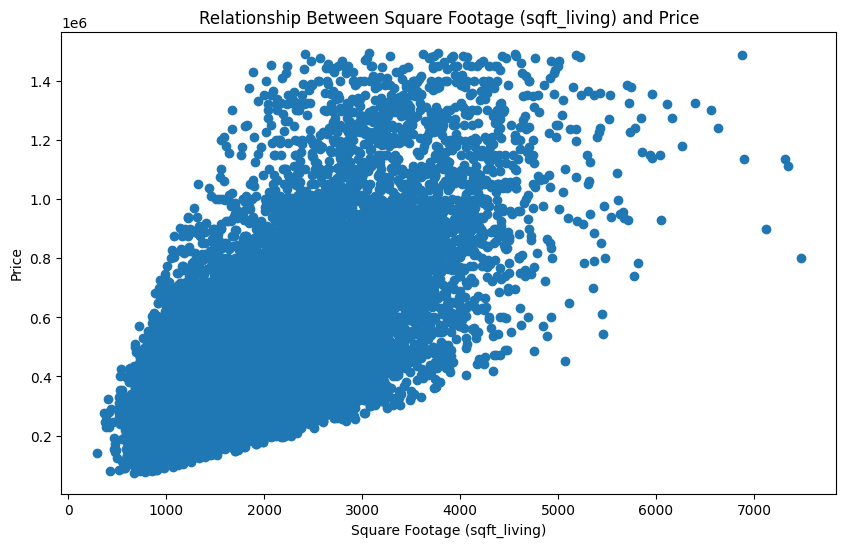

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'])
plt.title('Relationship Between Square Footage (sqft_living) and Price')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.show()



1.   There is a positive correletion between SQFT_living and price which is 0.65
2.   This indicates as the SQFT_living increases there is tendancy that price will also increase  



**CONDITION VS PRICE**

In [ ]:
condition_prices = df.groupby('condition')['price'].mean().reset_index()
condition_prices

,condition,price
0,Average,503445.476103
1,Fair- Badly worn,314259.584795
2,Good,484348.066174
3,Poor- Worn out,294239.655172
4,Very Good,550959.920245


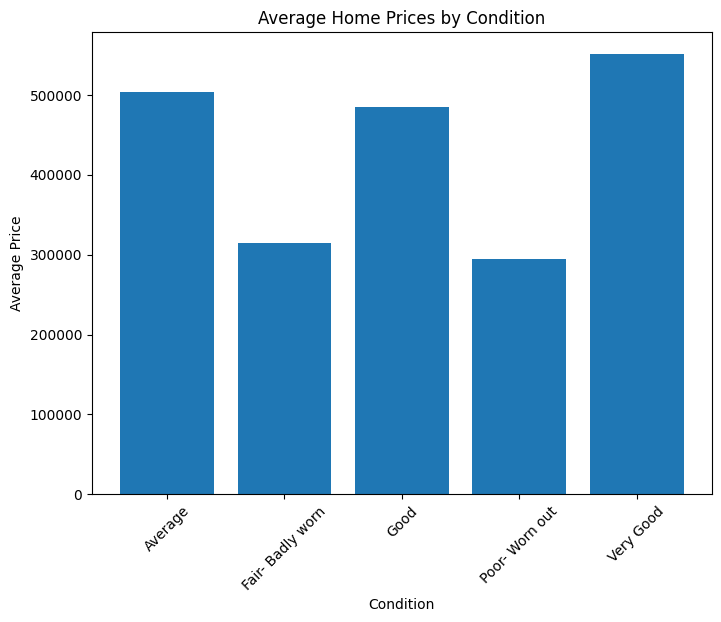

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(condition_prices['condition'], condition_prices['price'])
plt.title('Average Home Prices by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()



1.    Homes in better conditions tend to have higher average prices, which means buyers are willing to pay more for well-maintained homes



**YEAR_BUILT VS PRICE**

In [ ]:
current_year = 2023
df['age'] = current_year - df['yr_built']
average_age = df['age'].mean()
average_age

52.08005698005698

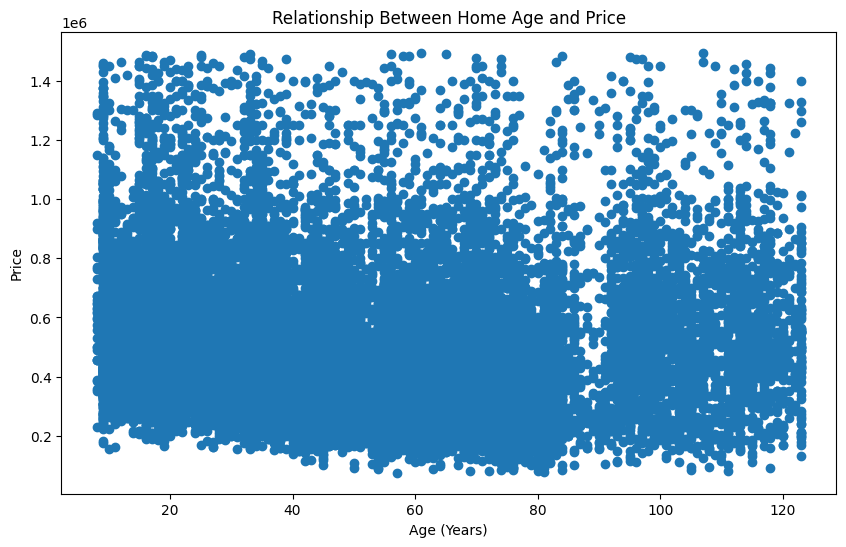

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'])
plt.title('Relationship Between Home Age and Price')
plt.xlabel('Age (Years)')
plt.ylabel('Price')
plt.show()



1. older homes may have historical charm but might require more maintenance which can affect the  market value as seen
2.   there is huge cluster in between 20 and 60 years most people prefer to buy house which is in between 20 to 40 years old



**SEASONAL MONTHLY PRICE**

In [ ]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['month']

0        10
1        11
2         1
3         3
4         9
         ..
21055    11
21056     3
21057     5
21058     5
21059     2
Name: month, Length: 21060, dtype: int64

In [ ]:
monthly_sales = df.groupby('month').size()
monthly_avg_prices = df.groupby('month')['price'].mean()
print(monthly_avg_prices)
print(monthly_sales)

month
1     477412.949260
2     473161.422477
3     502592.655684
4     523245.234727
5     504691.617584
6     516702.223529
7     509283.465246
8     496892.309360
9     493715.511494
10    499906.959106
11    482637.988364
12    485165.902166
Name: price, dtype: float64
month
1      946
2     1219
3     1821
4     2177
5     2343
6     2125
7     2158
8     1891
9     1740
10    1834
11    1375
12    1431
dtype: int64


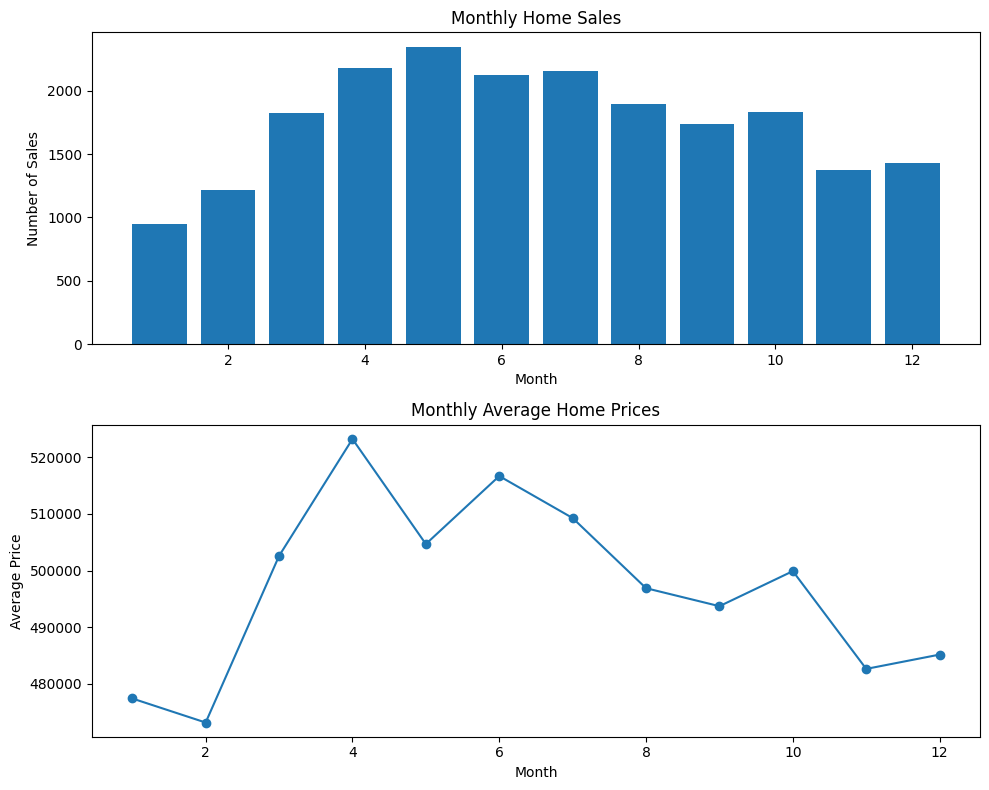

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))


ax1.bar(monthly_sales.index, monthly_sales)
ax1.set_title('Monthly Home Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Sales')

ax2.plot(monthly_avg_prices.index, monthly_avg_prices, marker='o', linestyle='-')
ax2.set_title('Monthly Average Home Prices')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Price')

plt.tight_layout()
plt.show()

In [ ]:
correlation = df['bathrooms'].corr(df['price'])
correlation

0.4860315327542177

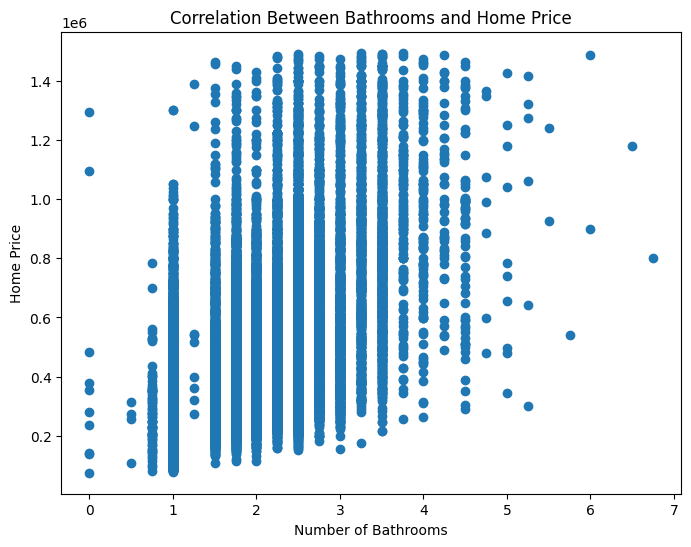

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bathrooms'], df['price'])
plt.title('Correlation Between Bathrooms and Home Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Home Price')
plt.show()

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,age,month
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198,61,10
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287,107,11
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227,56,1
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228,33,3
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215,65,9


In [ ]:
grade_stats = df.groupby('grade').agg({
    'price': 'mean',
    'bedrooms': 'mean',
    'bathrooms': 'mean',
    'sqft_living': 'mean',
    'sqft_lot': 'mean',
    'floors': 'mean'
}).reset_index()

grade_stats

,grade,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,1,1.420000e+05,0.000000,0.000000,290.000000,20875.000000,1.000000
1,3,2.056667e+05,1.000000,0.250000,596.666667,26953.000000,1.000000
2,4,2.143810e+05,1.482759,0.905172,660.482759,22101.482759,1.034483
3,5,2.485240e+05,2.388430,1.113636,983.326446,24019.909091,1.086777
4,6,3.019196e+05,2.685967,1.243499,1191.561335,12646.953876,1.108685
5,7,4.016761e+05,3.244003,1.826676,1686.632266,11774.590204,1.296664
6,8,5.368583e+05,3.474077,2.345080,2178.607587,13496.627795,1.668875
7,9,7.334475e+05,3.758045,2.653059,2841.686532,20950.852602,1.859158
8,10,9.041302e+05,3.858038,2.938413,3431.910230,30044.957203,1.895616
9,11,1.085750e+06,4.072000,3.320000,4114.800000,35253.800000,1.934000


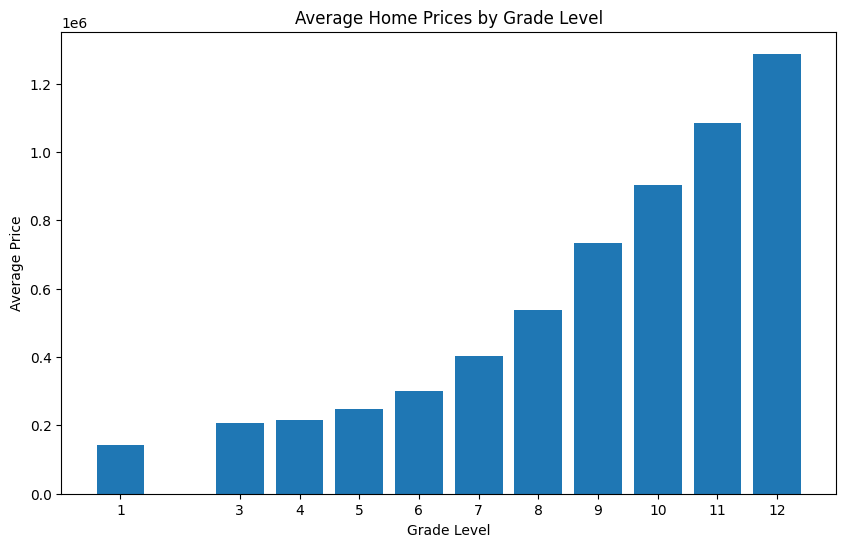

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(grade_stats['grade'], grade_stats['price'])
plt.title('Average Home Prices by Grade Level')
plt.xlabel('Grade Level')
plt.ylabel('Average Price')
plt.xticks(grade_stats['grade'])
plt.show()



1. Good Graded house tend to have hiegher price as compared to low graded house   




In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
monthly_avg_prices = df['price'].resample('M').mean()
monthly_avg_prices

date
2014-05-31    506537.741560
2014-06-30    516702.223529
2014-07-31    509283.465246
2014-08-31    496892.309360
2014-09-30    493715.511494
2014-10-31    499906.959106
2014-11-30    482637.988364
2014-12-31    485165.902166
2015-01-31    477412.949260
2015-02-28    473161.422477
2015-03-31    502592.655684
2015-04-30    523245.234727
2015-05-31    499616.992000
Freq: M, Name: price, dtype: float64

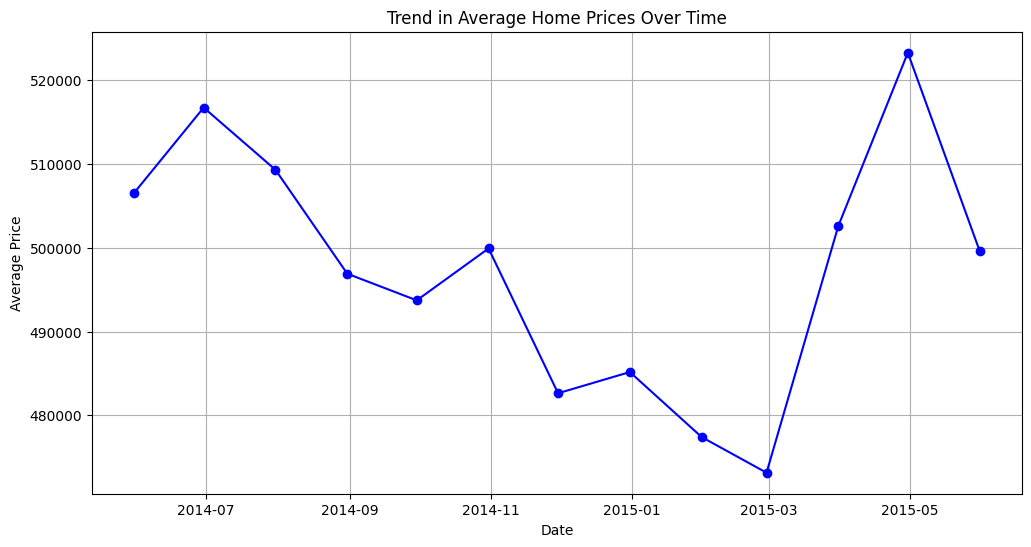

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_prices.index, monthly_avg_prices, marker='o', linestyle='-', color='b')
plt.title('Trend in Average Home Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()




1.  The analysis of the dataset reveals a gradual decline in home prices from late 2014 to early 2015. However, an interesting anomaly occurs in the first quarter of 2015, where there is a noticeable spike in home prices. This spike is followed by a subsequent decline in home prices during the second quarter of 2015. These fluctuations in home prices suggest that the real estate market experienced some unusual dynamics during this period, warranting further investigation to understand the underlying factors contributing to these price variations.



In [ ]:
floor_prices = df.groupby('floors')['price'].mean().reset_index()
floor_prices

,floors,price
0,1.0,426984.585398
1,1.5,538365.585767
2,2.0,582497.539312
3,2.5,756960.198473
4,3.0,536603.820946
5,3.5,595214.285714


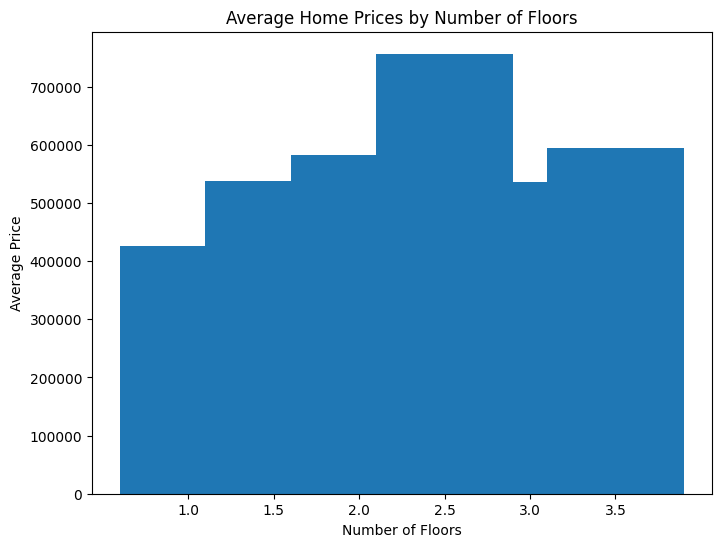

In [ ]:

plt.figure(figsize=(8, 6))
plt.bar(floor_prices['floors'], floor_prices['price'])
plt.title('Average Home Prices by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.xticks(floor_prices['floors'])
plt.show()


Homes with 2 to 2.5 floors generally exhibit higher prices compared to those with 1 floor or 3 floors in the dataset. This suggests a notable correlation between the number of floors and home prices, with two-and-a-half-story homes often commanding premium prices.


In [ ]:
df.head()

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,age,month
0,2014-10-22,629000615,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198,61,10
1,2014-11-26,4141800215,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287,107,11
2,2015-01-29,6448000020,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227,56,1
3,2015-03-31,9522300010,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228,33,3
4,2014-09-11,31000165,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215,65,9


<Figure size 1200x600 with 0 Axes>

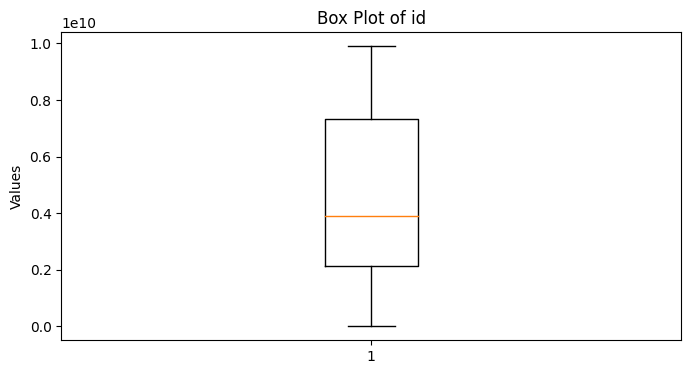

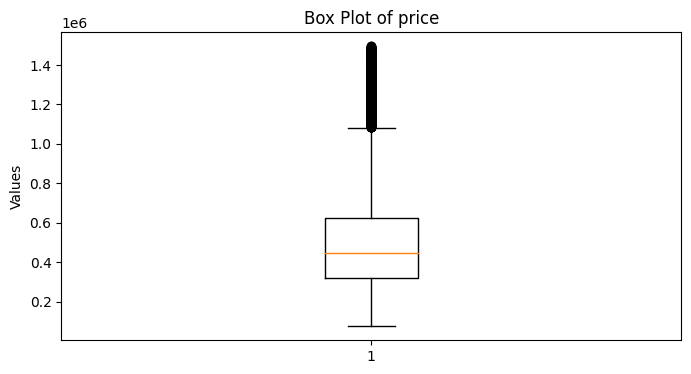

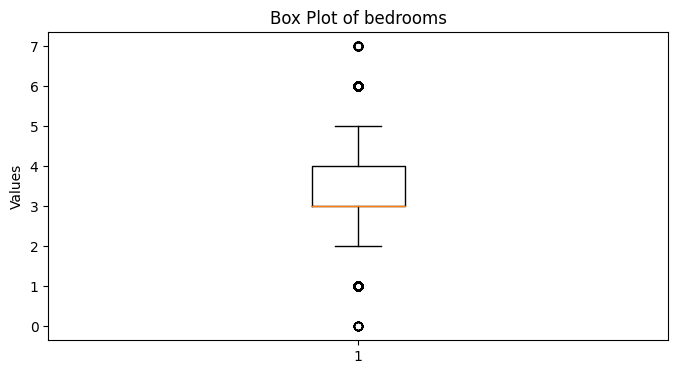

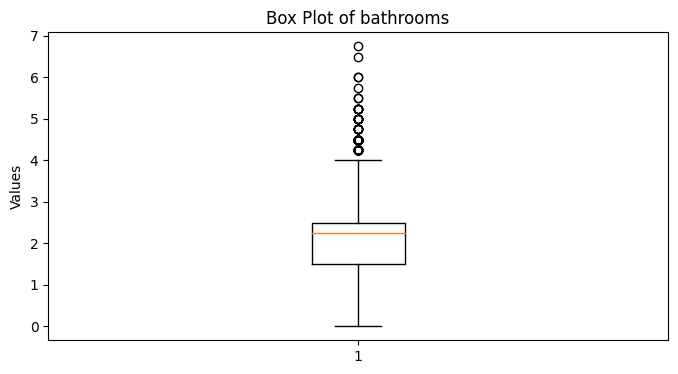

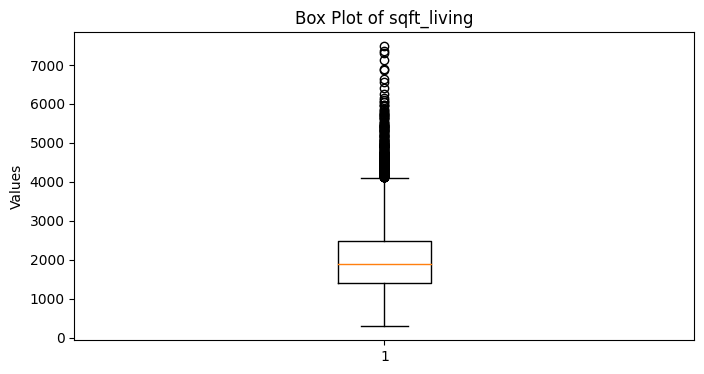

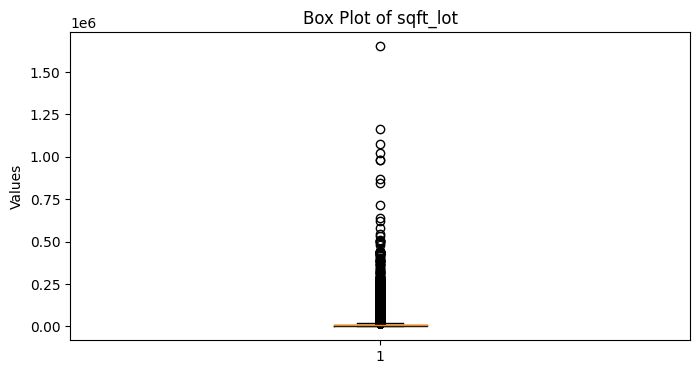

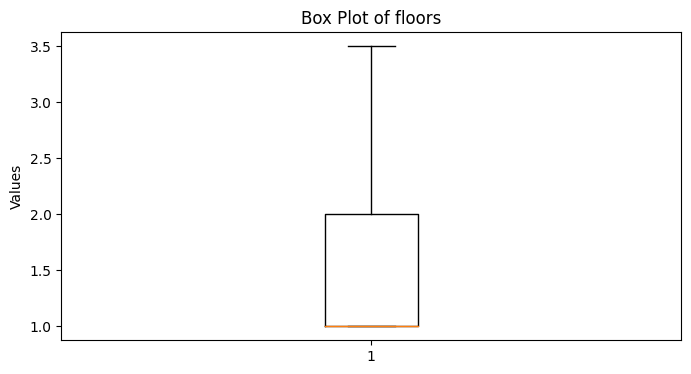

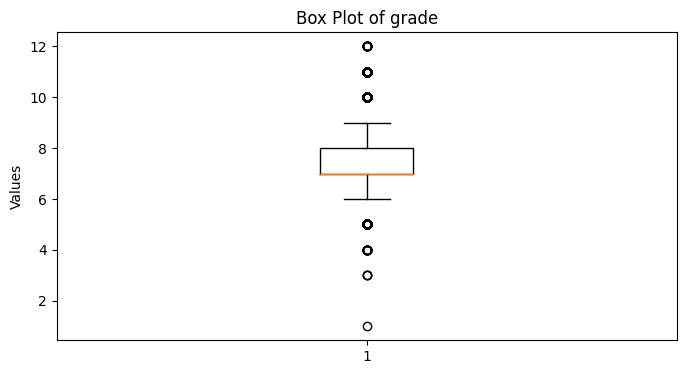

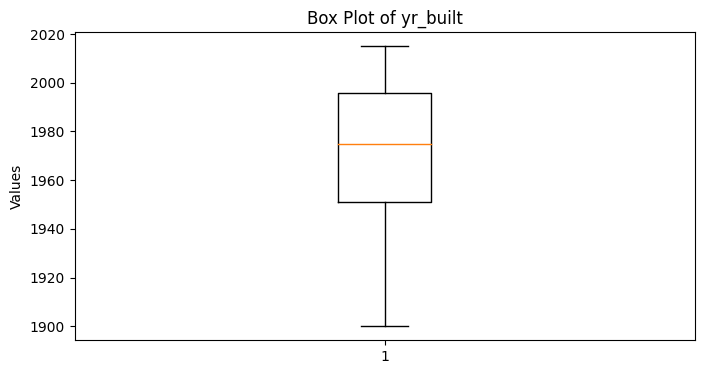

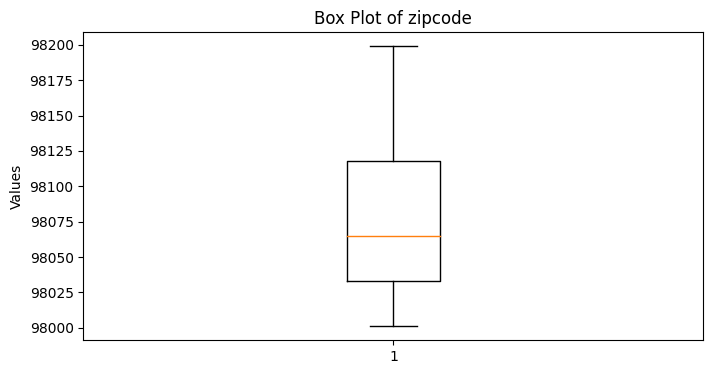

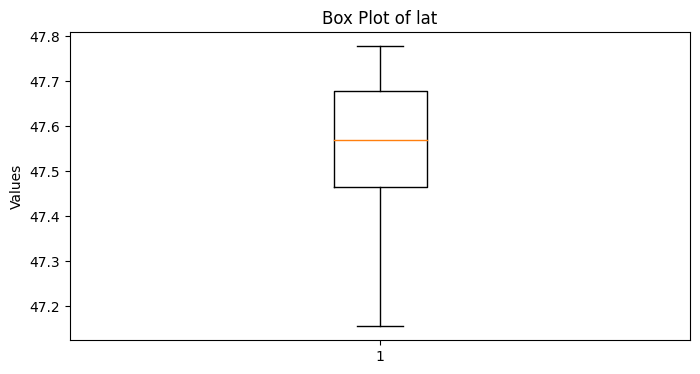

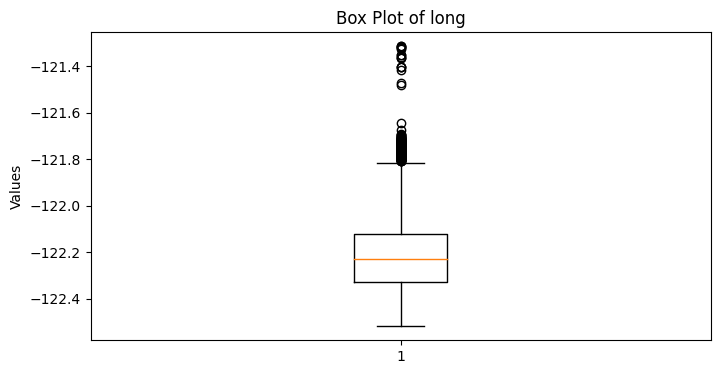

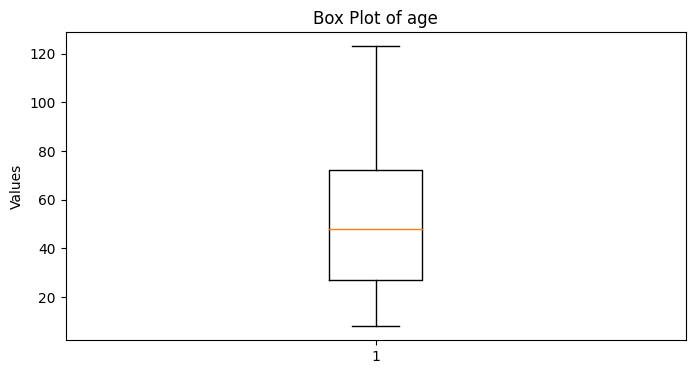

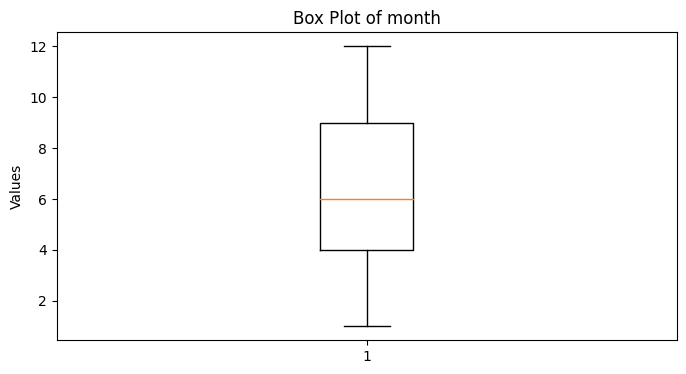

In [ ]:
plt.figure(figsize=(12, 6))


for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Values')
    plt.show()

In [ ]:
def handle_outlier(df, threshold=1.5):
    df_cleaned = df.copy()
    for col in df_cleaned.select_dtypes(include='number').columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [ ]:
df_cleaned = handle_outlier(df)

<Figure size 1200x600 with 0 Axes>

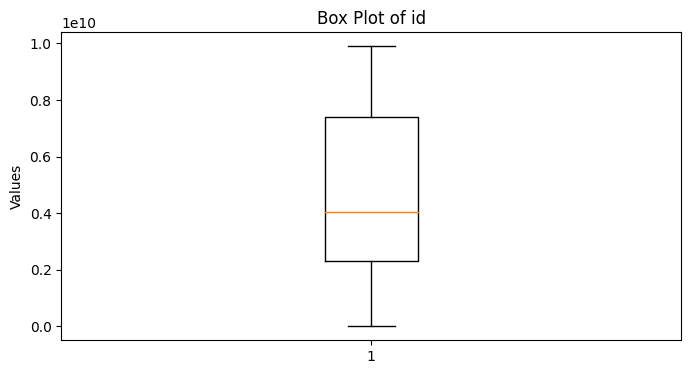

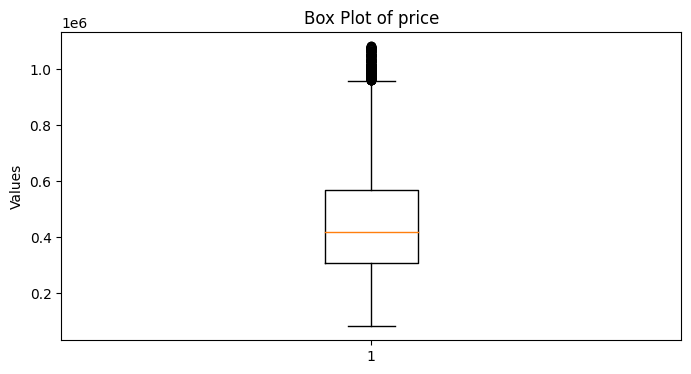

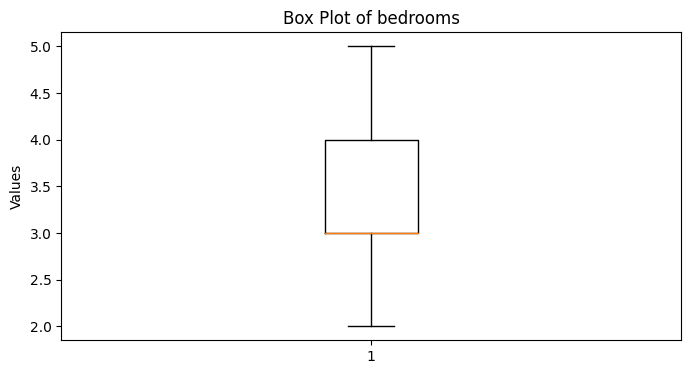

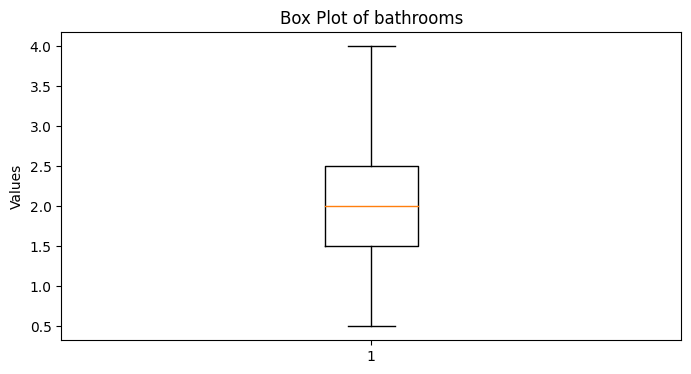

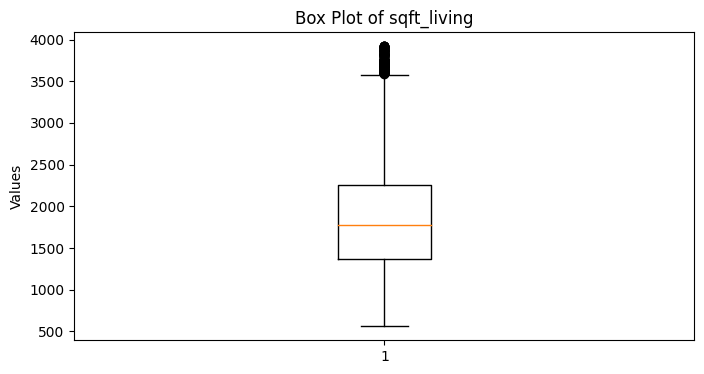

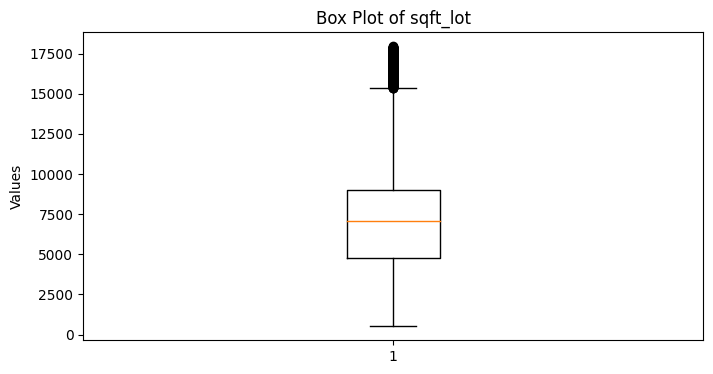

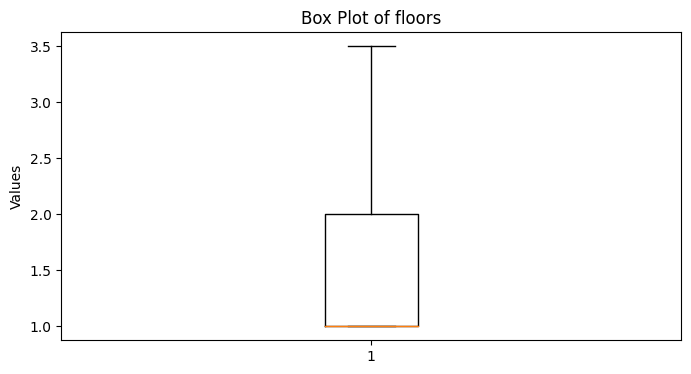

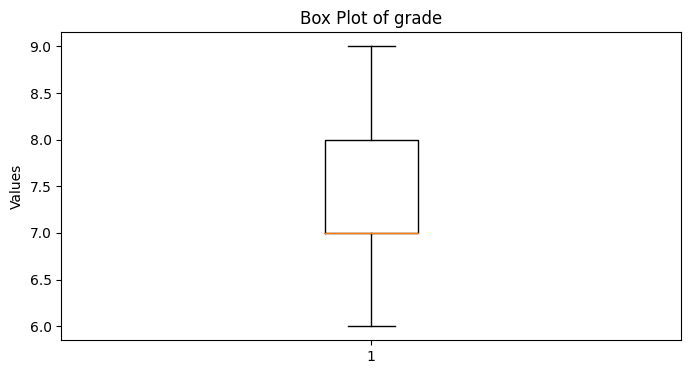

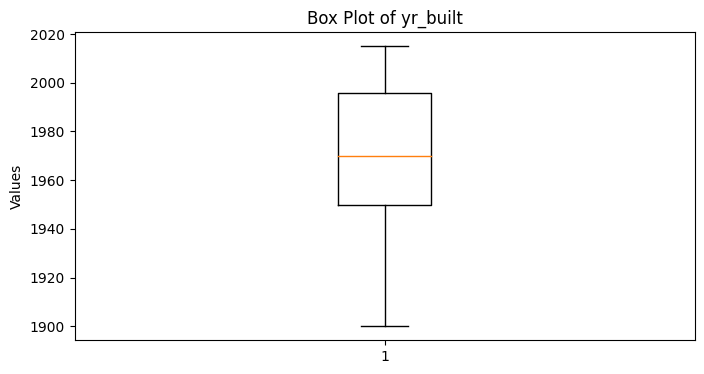

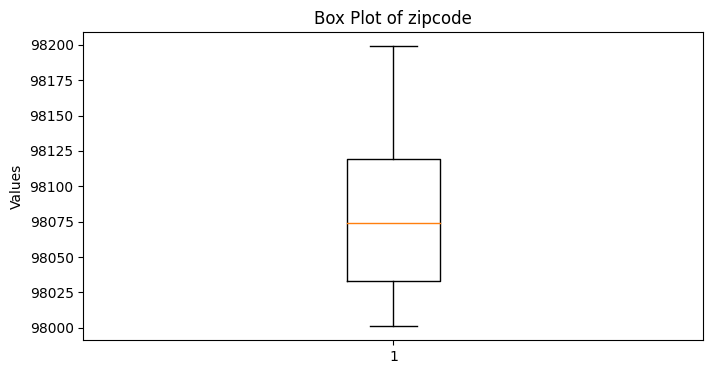

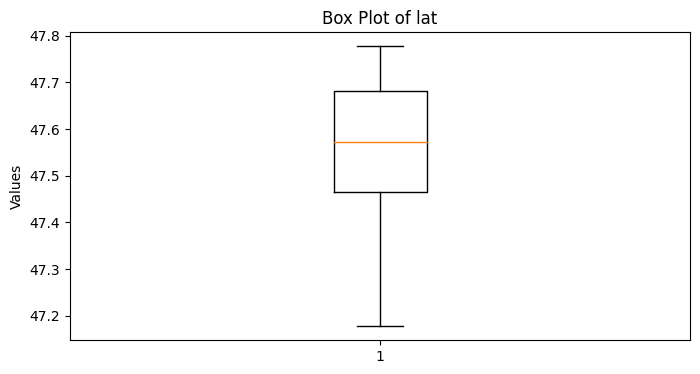

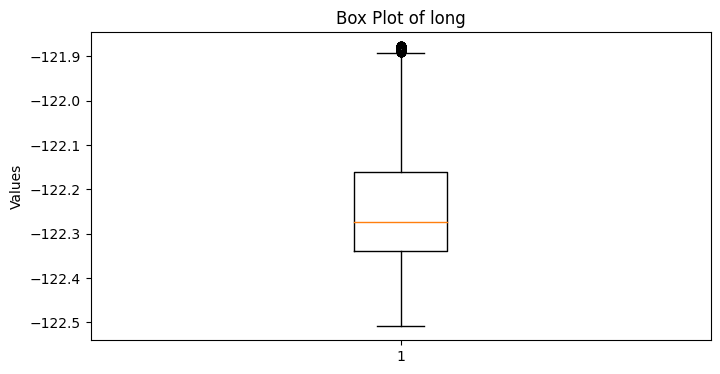

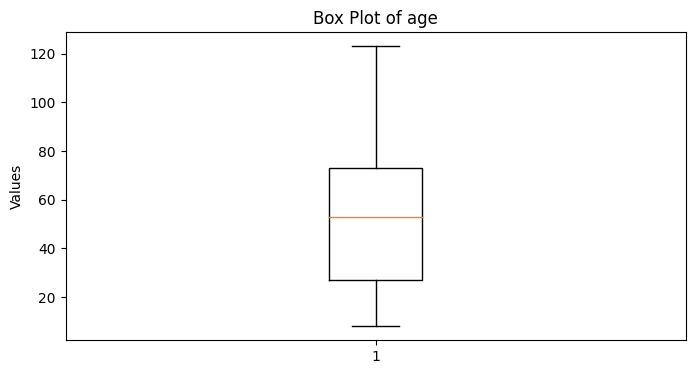

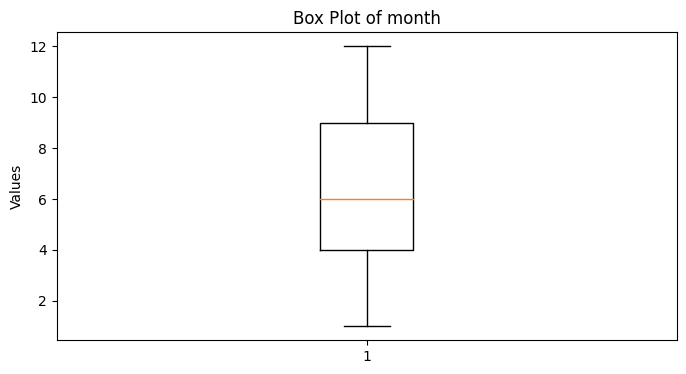

In [ ]:

plt.figure(figsize=(12, 6))


for column in df_cleaned.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_cleaned[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Values')
    plt.show()

In [ ]:
df.head()

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,age,month
0,2014-10-22,629000615,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198,61,10
1,2014-11-26,4141800215,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287,107,11
2,2015-01-29,6448000020,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227,56,1
3,2015-03-31,9522300010,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228,33,3
4,2014-09-11,31000165,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215,65,9


In [ ]:
df1 = df.copy()

In [ ]:
df1.drop(['date','id','zipcode','lat','long','age','month'],axis = 1 ,inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df1 = pd.get_dummies(data=df1, columns=['waterfront', 'view', 'condition'])


In [ ]:
X = df1.drop(columns=['price'])
y = df1['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,waterfront_No,waterfront_Yes,view_Average,view_Excellent,view_Fair,view_Good,view_No View,condition_Average,condition_Fair- Badly worn,condition_Good,condition_Poor- Worn out,condition_Very Good
11015,3,2.50,2240,6396,2.0,7,2002,1,0,0,0,0,0,1,1,0,0,0,0
17949,2,2.00,1540,5000,1.5,8,1986,1,0,0,0,0,0,1,1,0,0,0,0
19933,4,1.75,1980,9000,1.0,7,1978,1,0,0,0,0,0,1,0,1,0,0,0
3048,3,3.25,4610,81935,2.0,9,1984,1,0,0,0,0,0,1,0,0,1,0,0
17443,2,1.00,960,4920,1.0,6,1942,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3,1.75,1680,14630,1.5,8,1985,1,0,0,0,0,0,1,1,0,0,0,0
11964,4,2.00,1510,3240,1.0,7,1901,1,0,0,0,0,0,1,0,0,0,0,1
5390,5,3.50,2950,2932,3.0,8,2004,1,0,0,0,0,0,1,1,0,0,0,0
860,4,1.75,2110,6708,1.0,8,1941,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 23097633253.679527
R-squared: 0.6010466449541493
